# Lab: Regression models

This chapter follows closely chapter 3 and 4 of James et al. (2023) book.

# 1. Linear models

In [5]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import seaborn as sns

In [3]:
# Setup matplotlib for graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

OSError: 'seaborn-white' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

Let us check if we had imported everything we need using the function `dir`

In [6]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '_4',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'axes3d',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'plt',
 'poly',
 'quit',
 'sm',
 'sns',
 'subplots',
 'summarize']

## 1. Linear Regression

We will use the `Boston` housing dataset. It contains median house value (`medv`) for 506 neighborhoods in the Boston Metropolitan Area. The objective is to predict `medv` using 13 predictors (=covariates) and `statsmodels`, a package implementing reg. methods.

Load the data and check the columns

In [7]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [8]:
# Overview of all variables
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [9]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


We can have more information on the single variables using the function describe.

In [18]:
#Some descriptive statistics for all the variables
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Let's call a single variable `medv`. We have three simple ways to do it: 
1. Use squared brackets as if the varaible was a component of a dictionary
2. Use  dot subscripts as if the variable was a function of the data
3. Use the `loc` function (best practice)

In [19]:
# 1. Brackets
Boston['medv']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [20]:
# 2. Dot
Boston.medv

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [21]:
# 3. The loc function
Boston.loc[:,'medv']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [22]:
#Descriptive statistics for medv variable only
Boston['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [23]:
Boston['lstat'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

Let's fit the following linear regression model. 
$$ medv = \beta_{0} + \beta_{1}  lstat $$
Let's see a visual relationship

In [10]:
def make_fig():
    
    # Init figure
    fig, ax = plt.subplots(1,1)
    ax.set_title('Relationship between Lstat and median value');

    # Plot scatter and best fit line
    sns.regplot(x=Boston.lstat, y=Boston.medv, ax=ax, order=1, ci=None, scatter_kws={'color':'r', 's':20})
    ax.set_xlim(-0,40); ax.set_ylim(ymin=0)
    ax.legend(['Data','Least Square Fit']);

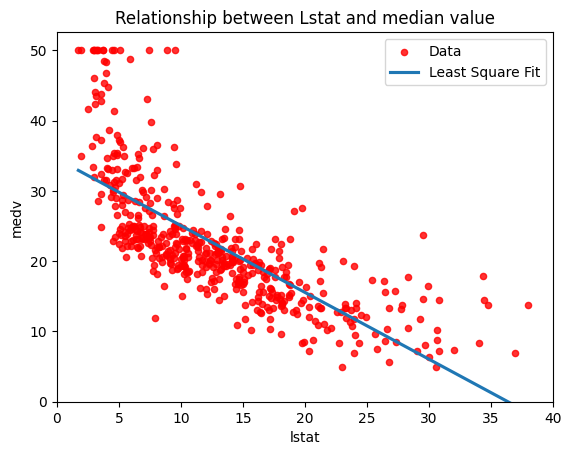

In [11]:
make_fig()

We are creating the matrix with an intercept column (=1) and with the value of our predictor for each observation.

In [13]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


We now extract the response associated to each row and fit the model.

In [14]:
y = Boston['medv'] #Extract the response
model = sm.OLS(y, X) #Specifies the model 
results = model.fit() #Fit the model 

In [30]:
summarize(results) #see the output

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


What can you say? 

## 1.1 Using transformations: fit and transform

The previous model was straitghtfoward: 1 variable, linear relationship, but in reality we are going to use much more difficult models. We can use the `sklearn` package to handle this task: _transform_. A transform is an object that is created with some parameters as arguments.

We rely on `MS()` a general approach developed in `ISLP`. It creates a transform object, and then a pair of methods are used to construct the corresponding matrix. 

We first describe this process for our previous simple regression model. Here, the transform is created by the expression `design = MS(['lstat'])`.

Then, `fit()`takes the original array and do computations on it (e.g., meands, sd, scaling). `transform()`applies the fitted transfromation to the array of data, and produces the model matrix. 

In [15]:
design = MS(['lstat']) 
design = design.fit(Boston) #Checks if the variable exists. 
X = design.transform(Boston) #Constructs the the model matrices with 2 columns
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [16]:
design = MS(['lstat'])
X = design.fit_transform(Boston) #Combines fit and transform in one
X[:4] #Shows only the first 4 rows

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           5.08e-88
Time:                        13:28:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
results.params #Shows only the fitted coefficients

intercept    34.553841
lstat        -0.950049
dtype: float64

Can use `get_prediction()`to obtain predictions and do inference for $\hat{y}$ for given values of $x$.

In [18]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]}) #Create a new data frame with lstat, with the values at which we want to make prediction 
newX = design.transform(new_df) #create the corresponding matrix
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [36]:
new_predictions = results.get_prediction(newX); #compute the prediction at newX
new_predictions.predicted_mean #see the results by extracting the mean 

array([29.80359411, 25.05334734, 20.30310057])

In [37]:
new_predictions.conf_int(alpha=0.05) #produce 95% confidence intervals


array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [38]:
new_predictions.conf_int(obs=True, alpha=0.05) #Prediction intervals: set obs=True


array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

For instance, the 95% confidence interval associated with an `lstat` value of 5 is (29.01, 30.60), and the 95% prediction interval is (17.57, 42.04). As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 29.80 for medv when lstat equals 5), but the latter are substantially wider.

### Defining functions to visualize the data 

Define a function called `abline` and has 3 arguments `ax, b, m`. `ax` is an axis object for an existing plot, `b`is the intercept and `m` the slope. Then, we add other plotting options into `ax.plot` using `*args` which allows any number of non-named arguments and `*kwargs` allows any number of named arguments to `abline`. 

In [12]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

NameError: name 'results' is not defined

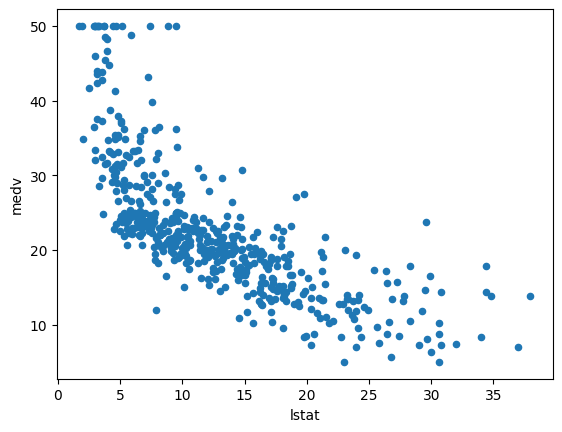

In [13]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1],
       'r--', # produce a red dashed line
       linewidth=3) #make it of width 3

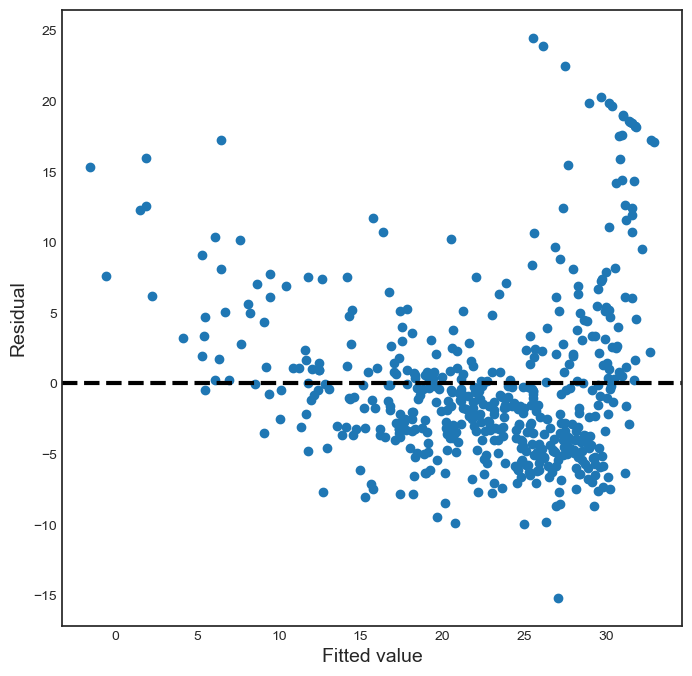

In [22]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

We add a horizontal line at 0 for reference using the ax.axhline() method, indicating it should be black `(c='k')` and have a dashed linestyle `(ls='--')`.


## 1.2 Multiple linear regression

Add an extra variable: `age`

In [23]:
X = MS(['lstat', 'age']).fit_transform(Boston) 
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


Shortcut to include all the variables:

In [25]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [26]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


Can see that `age`has a high $p$-value, one might want to run a regression without it. 

In [27]:
minus_age = Boston.columns.drop(['medv', 'age']) 
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


### Multivariate Goodness of Fit

In [28]:
#This shows us everything available
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

Let see the $R^2$ and RSE.

In [29]:
results.rsquared

0.7343070437613076

In [30]:
np.sqrt(results.scale)

4.798034335596367

### Interaction terms

The tuple `("lstat","age")` can be used to include an interaction term between `lstat` and ` age`. 

In [31]:
X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


### Non-linear transformations of the predictors

Can include a polynomial functions of any predictors using `poly()`. 

In [32]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


Can visualize this relationship

In [34]:
def make_fig_nl():
    
    # Figure Non linear 
    fig, ax = plt.subplots(1,1)
    ax.set_title('Non linear relationship')

    # Plot polinomials of different degree
    plt.scatter(x=Boston.lstat, y=Boston.medv, facecolors='None', edgecolors='k', alpha=.3) 
    sns.regplot(x=Boston.lstat, y=Boston.medv, ci=None, label='Linear', scatter=False, color='orange')
    sns.regplot(x=Boston.lstat, y=Boston.medv, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
    plt.legend()
    plt.ylim(0,40)
    plt.xlim(0,50);

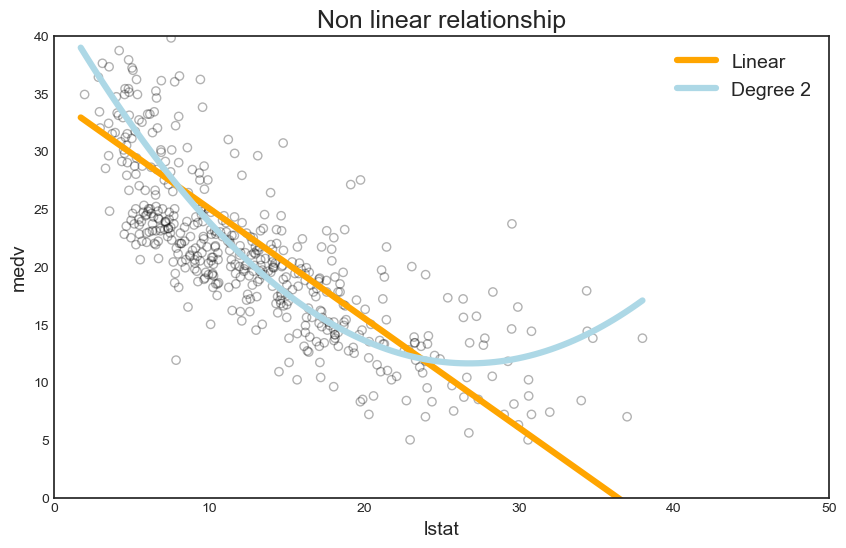

In [35]:
make_fig_nl()

Can see that the the quadratic form of `lstat` is statistically significant, but does it really improve the model? We can measure the extent to which it does using `anova_lm()`. 

In [36]:
anova_lm(results1, results3)


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\stats\anova.py:374: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  table[pr_test][table['F'].isnull()] = np.nan


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


The `anova_lm()` function performs a hypothesis test comparing the two models. The null hypothesis is that the quadratic term in the bigger model is not needed, and the alternative hypothesis is that the bigger model is superior. Here the F-statistic is 177.28 and the associated p-value is zero. In this case the F-statistic is the square of the t-statistic for the quadratic term in the linear model summary for `results3` --- a consequence of the fact that these nested models differ by one degree of freedom. This provides very clear evidence that the quadratic polynomial improves the linear model. Is it surprising? 

## 1.3 Qualitative predictors

Use the `Carseats`data to predict `Sales` (child car seat sales) in 400 locations. 

In [37]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

`ShelveLoc` is a qualitative variable. It's an indicator of the quality of the shelving location (space in the store where the seat is displayed). It takes 3 values: `Bad`, `Medium`, and `Good`. `ModelSpec()` generates dummy variables automatically, what we call _one-hot encoding_. Sum of these dummies is 1, the first column is dropped to avoid collinearity (here `Bad`).  

In [38]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


First line: we made `allvars` a list, so that we could add the interaction terms two lines down.

Our model-matrix builder has created a `ShelveLoc[Good]` dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. Same for `ShelveLoc[Medium]`.

How do you interpret `ShelveLoc[Good]`? What about `ShelveLoc[Medium]`?

# 2. Classification problems

We will use the `Smarket` data. It contains  of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. For each date, we have the percentage returns for each of the five previous trading days,  `Lag1`  through
 `Lag5`. We have also recorded  `Volume`  (the number of shares traded on the previous day, in billions),  `Today`  (the percentage return on the date in question) and  `Direction` (whether the market was  `Up`  or  `Down`  on this date).

In [39]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

#Specific to this part 
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [40]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


Plot the volume over time. We see that  `Volume`
is increasing over time. In other words, the average number of shares traded
daily increased from 2001 to 2005.

<AxesSubplot:>

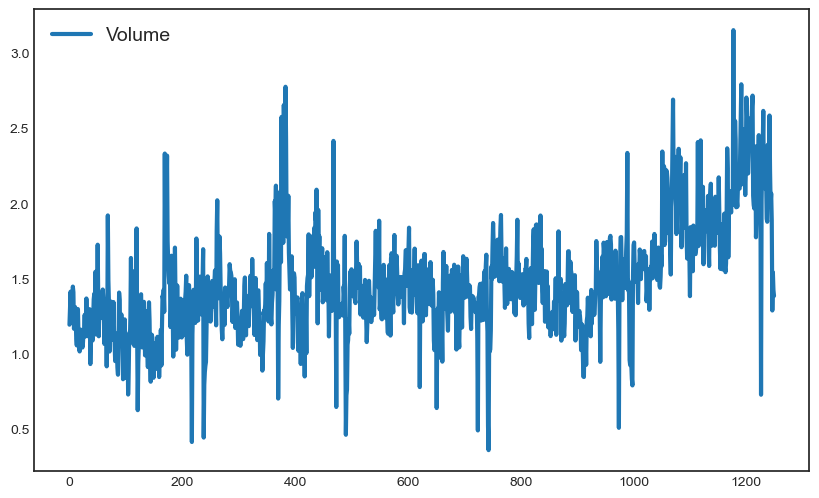

In [41]:
Smarket.plot(y='Volume')

### 2.1 Logistic Regression

We will fit a logistic regression model to predict  `Direction`  using  `Lag1`  through  `Lag5`  and  `Volume`. The `sm.GLM()`  function fits *generalized linear models*, a class of models that includes logistic regression.  We could also have used 
the function `sm.Logit()` fits a logistic regression
model directly. The syntax of
`sm.GLM()` is similar to that of `sm.OLS()`, except
that we must pass in the argument `family=sm.families.Binomial()`
in order to tell `statsmodels` to run a logistic regression rather than some other
type of generalized linear model.

In [42]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year']) #keep all the variables excepting today, direction, year
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up' #have to define wich value of y we set
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)


,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


What can you say? 
Few tricks to access the output: `params` to access the coefficient, `pvalues` for the $p$-values.

In [43]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [44]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

As we have seen earlier, we can use the `predict` method to predict the probability that the market will go up for specific values of the $x$. 

In [45]:
probs = results.predict()
probs[:10] #looks only at the first 10 

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

The results obtained are on the **probability scale** but do not allow us to make predictions. To do so, we must convert these predicted probabilities into class labels `Up` or `Down`. 
First, we create an array with 1250 rows equal to `Down`. Then, we switch the value to `Up` if the predicted value is higher than $0.5$.

In [46]:
labels = np.array(['Down']*1250)
labels[probs>0.5] = "Up"

The `confusion_table()`
function  summarizes these predictions, showing   how
many observations were correctly or incorrectly classified. This function, adapted from a similar function in the module `sklearn.metrics`,  transposes the resulting
matrix and includes row and column labels.
The `confusion_table()` function takes as first argument the
predicted labels, and second argument the true labels.

In [47]:
confusion_table(labels, Smarket.Direction)


Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


The diagonal elements indicate correct predictions, the off-diagonal represent incorrect predictions. 
Let's use the `np.mean()` function to compute the fraction of days for which the
prediction was correct. 

In [48]:
(507+145)/1250, np.mean(labels == Smarket.Direction)

(0.5216, 0.5216)

What can you say? Is it a good result? What could we do next?
Next, we examine how well it predicts the *leave out* data.  This
will give a more realistic error rate, because we are interested in our model’s performance not on the data that
we used to fit the model, but rather on days in the future for which
the market’s movements are unknown.


We first create a Boolean vector
corresponding to the observations from 2001 through 2004 (*training data*). We  then
use this vector to create a held out data set of observations from
2005 (*test data*).


In [49]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape

(252, 9)

The object `train` is a vector of 1,250 elements, corresponding
to the observations in our data set. The elements of the vector that
correspond to observations that occurred before 2005 are set to
`True`, whereas those that correspond to observations in 2005 are
set to `False`.  `train` is a
*boolean*   array, since its
elements are `True` and `False`.  Boolean arrays can be used
to obtain a subset of the rows or columns of a data frame
using the `loc` method. For instance,
the command `Smarket.loc[train]` would pick out a submatrix of the
stock market data set, corresponding only to the dates before 2005,
since those are the ones for which the elements of `train` are
`True`.  The `~` symbol can be used to negate all of the
elements of a Boolean vector. That is, `~train` is a vector
similar to `train`, except that the elements that are `True`
in `train` get swapped to `False` in `~train`, and vice versa.
Therefore, `Smarket.loc[~train]` yields a
subset of the rows of the data frame
of the stock market data containing only the observations for which
`train` is `False`.
The output above indicates that there are 252 such
observations.

We now fit a logistic regression model using only the subset of the
observations that correspond to dates before 2005. We then obtain predicted probabilities of the
stock market going up for each of the days in our test set --- that is,
for the days in 2005.

In [50]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)


Now, we will compare the predictions for 2005 to the movement observed in our data for the same period. First, we are storing the test and training labels.

In [52]:
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]


In [53]:
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [54]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.4801587301587302, 0.5198412698412699)

The test accuracy is about 48% while the error rate is about 52%

### 2.2 K-nearest neighbors
 We fit the classifier
using the `fit` method. New
predictions are formed using the `predict` method
of the object returned by `fit()`. One has to choose the number of neighbors to consider. We set $K=3$.

In [55]:
knn3 = KNeighborsClassifier(n_neighbors=3)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn3.fit(X_train, L_train)
knn3_pred = knn3.predict(X_test)
confusion_table(knn3_pred, L_test)

Truth,Down,Up
Predicted,,
Down,48,62
Up,63,79


In [81]:
np.mean(knn3_pred == L_test)

0.503968253968254

It performs slightly better than the logisitic regression model.

KNN is a powerful classifier, let us go further with another dataset. To show it, we will use the `Caravan`  data set. This data set includes 85
predictors that measure demographic characteristics for 5,822
individuals. The response variable is  `Purchase`, which
indicates whether or not a given individual purchases a caravan
insurance policy. In this data set, only 6% of people purchased
caravan insurance.

In [56]:
Caravan = load_data('Caravan')
Purchase = Caravan.Purchase
Purchase.value_counts()

Purchase
No     5474
Yes     348
Name: count, dtype: int64

We create a feature dataframe including all columns except `Purchase`.

In [57]:
feature_df = Caravan.drop(columns=['Purchase'])

KNN  predicts the class of a given test
observation by identifying the observations that are nearest to it, hence
the scale of the variables matters. Any variables that are on a large
scale will have a much larger effect on the *distance* between
the observations, and hence on the KNN accuracy, than variables that
are on a small scale. Furthermore, the
importance of scale to the KNN classifier leads to another issue: if
we measured  `salary`  in Japanese yen, or if we measured
 `age`  in minutes, then we’d get quite different classification
results from what we get if these two variables are measured in
dollars and years.

How to solve such problem? A good way to deal with it is to *standardize*  the data to have all of them on a comparable scale. This is accomplished
using the `StandardScaler()`
transformation.

In [59]:
scaler = StandardScaler(with_mean=True, #to substract the mean
                        with_std=True, #scale the column with sd=1
                        copy=True) #copy the data and not erase it

In [60]:
scaler.fit(feature_df) #compute the parameters for the scaling and stored in scaler
X_std = scaler.transform(feature_df) #construct the standardize x


Check if it had worked

In [61]:
feature_std = pd.DataFrame(
                 X_std,
                 columns=feature_df.columns);
feature_std.std()


MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64

Using the function `train_test_split()`  we now split the observations into a test set,
containing 1000 observations, and a training set containing the remaining
observations. The argument `random_state=0` ensures that we get
the same split each time we rerun the code.

In [66]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(np.asarray(feature_std),
                            Purchase,
                            test_size=1000,
                            random_state=0)

We now fit a KNN model on the training data using $K=1$ and evaluate its performance on the test data.

In [67]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test != "No")


(0.111, 0.067)

The KNN error rate is about 11%, is it a good result? Is the overall error rate the most relevant prediction performance indicator for an insurance company with a non-trivial cost of selling insurance?

#### Tuning parameters

The number of neighbors in KNN is referred to as a *tuning parameter* (or hyperparameter*).
We do not know *a priori* what value to use. It is therefore of interest
to see how the classifier performs on test data as we vary these
parameters. This can be achieved with a `for` loop to construct a *search grid*.
Here we use a for loop to look at the accuracy of our classifier in the group predicted to purchase
insurance as we vary the number of neighbors from 1 to 5:

In [68]:
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    templ = ('K={0:d}: # predicted to rent: {1:>2},' +
            '  # who did rent {2:d}, accuracy {3:.1%}')
    pred = C.loc['Yes'].sum()
    did_rent = C.loc['Yes','Yes']
    print(templ.format(
          K,
          pred,
          did_rent,
          did_rent / pred))

K=1: # predicted to rent: 62,  # who did rent 9, accuracy 14.5%
K=2: # predicted to rent:  6,  # who did rent 1, accuracy 16.7%
K=3: # predicted to rent: 20,  # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4,  # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7,  # who did rent 1, accuracy 14.3%


Does it perform better than a logit? We use `sklearn` but it fits something like the *ridge regression* version of logistic regression. We modified it by setting the argument `C` to a very large number, hence it converges to the same solution as a logit. 

In [69]:
logit = LogisticRegression(C=1e10, solver='liblinear') #liblinear allows convergence 
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > .5, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,931,67
Yes,2,0


If we use $0.5$ as the predicted probability cut-off for the
classifier, then we have a problem: only two of the test observations
are predicted to purchase insurance.  However, we are not required to use a
cut-off of $0.5$. If we instead predict a purchase any time the
predicted probability of purchase exceeds $0.25$, we get much better
results: we predict that 29 people will purchase insurance, and we are
correct for about 31% of these people. This is almost five times
better than random guessing!

In [70]:
logit_labels = np.where(logit_pred[:,1]>0.25, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


In [ ]:
9/(20+9)


In [97]:
import sys

print(sys.version)

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


## Exercise

From James et al. (2023), pp. 196-197.

This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

In [15]:
#Type your answer here

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [17]:
#Type your answer here

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

In [18]:
#Type your answer here

(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [19]:
#Type your answer here

(g) Repeat (d) using KNN with K = 1.

In [21]:
#Type your answer here

(i) Which of these methods appears to provide the best results on
this data?

In [ ]:
#Type your answer here